<a href="https://colab.research.google.com/github/tucosh/kaggle/blob/main/tensorflow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# from https://www.tensorflow.org/tutorials/quickstart/beginner

import tensorflow as tf
print('TensorFlow version: ', tf.__version__) # 2.17.1

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")


TensorFlow version:  2.17.1


In [51]:
mnist = tf.keras.datasets.mnist
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train is type:', type(x_train), 'and shape:', x_train.shape)


x_train is type: <class 'numpy.ndarray'> and shape: (60000, 28, 28)


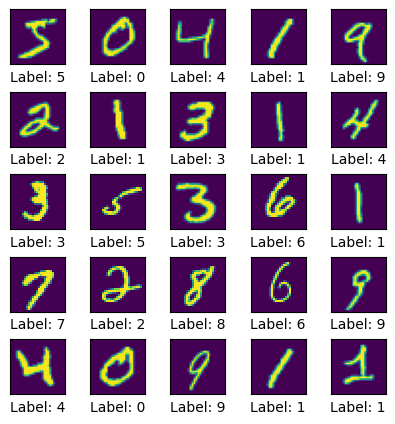

In [44]:
import matplotlib.pyplot as plt

# Visualise the first 25 values
plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.5)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel('Label: %d' % y_train[i])

In [48]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# type(model)

In [10]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.16581218, -0.36669242,  0.29683527,  0.03966809, -1.0358236 ,
        -0.33452615,  0.69417715,  0.12500024,  0.46875656, -0.08110704]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

2.7002935

In [13]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8556 - loss: 0.4829
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9562 - loss: 0.1456
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9680 - loss: 0.1083
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0868
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0730


In [15]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9765 - loss: 0.0756


[0.075607068836689, 0.9764999747276306]

In [16]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.74102357e-08, 4.12092305e-10, 3.69725672e-06, 1.19722201e-04,
        1.67074549e-10, 2.28065574e-07, 1.76201360e-12, 9.99875903e-01,
        5.18537036e-08, 3.83922384e-07],
       [8.19277147e-07, 1.53719258e-04, 9.99656320e-01, 1.75394933e-04,
        5.07201659e-12, 2.89527816e-06, 1.52989037e-06, 2.28407094e-12,
        9.25900713e-06, 5.22468180e-12],
       [1.12511691e-06, 9.95976627e-01, 1.02248065e-04, 4.59300391e-05,
        1.33725567e-04, 2.22719973e-05, 9.04699482e-05, 3.41518433e-03,
        2.10907165e-04, 1.51175971e-06],
       [9.99803722e-01, 1.24703570e-09, 4.28851999e-05, 3.07986596e-07,
        5.16746195e-06, 4.61607306e-05, 2.35697153e-05, 1.67875760e-06,
        3.26436513e-08, 7.64561628e-05],
       [1.59786614e-05, 5.47153267e-10, 4.83096983e-06, 1.39106376e-07,
        9.91549969e-01, 3.60784895e-07, 8.77846014e-06, 6.72639508e-05,
        1.99099691e-06, 8.35073087e-03]], dtype=float32)>